# Part III: Implementing & Improving AlexNet 

In this part we have implemented AlexNet and checked how to improve the model and applied that to solve
an image dataset containing three classes: dogs, cars and food.
The expected accuracy for this part is more than 90%.

In [1]:
# Import the libraries for unzipping the dataset
import zipfile
import os

zip_ref = zipfile.ZipFile('./cnn_dataset.zip', 'r') # Opens the zip file in read mode
zip_ref.extractall() # Extracts the files into the current directory
zip_ref.close()

# Storing the folder name of each category of our dataset
dogs_path = 'dogs/'
food_path = 'food/'
vehicles_path = 'vehicles/'

In [2]:
# Importing all the libraries required for the assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.layers import Dense, Input, Dropout
import sklearn.metrics
import time

In [3]:
# Initializing X and y to store the features and target values repectively
X = []
y = []

### STEP 1 - Load, preprocess, analyze the dataset and make it ready for training

#### Load dataset

In [4]:
# Inserting images from each folder(category) of the dataset 
# and appending a numeric value to each category as the target into a list
counter = 0
for filename in os.listdir(dogs_path):
  if counter < 10000:
    img = cv2.imread(os.path.join(dogs_path, filename))
    img = cv2.resize(img, (224, 224))
    X.append(img)
    y.append(0)   #  0 as target value for dogs
    counter+=1
  else:
    break

counter = 0
for filename in os.listdir(food_path):
  if counter < 10000:
    img = cv2.imread(os.path.join(food_path, filename))
    img = cv2.resize(img, (224, 224))
    X.append(img)
    y.append(1)   # 1 as target value for food
    counter += 1
  else:
    break

counter = 0
for filename in os.listdir(vehicles_path):
  if counter < 10000:
    img = cv2.imread(os.path.join(vehicles_path, filename))
    img = cv2.resize(img, (224, 224))
    X.append(img)
    y.append(2)   # 2 as target value for vehicles
    counter += 1
  else:
    break

In [5]:
# Taking a look at the image array of the first image
X[0]

array([[[  5,   9,  58],
        [  5,   9,  58],
        [  4,   8,  56],
        ...,
        [  5,  30,  25],
        [  4,  29,  25],
        [  4,  29,  25]],

       [[  5,   9,  58],
        [  5,   9,  58],
        [  4,   8,  57],
        ...,
        [  5,  30,  25],
        [  4,  29,  25],
        [  4,  29,  25]],

       [[  6,  10,  60],
        [  6,  10,  60],
        [  5,   8,  58],
        ...,
        [  9,  34,  28],
        [  9,  35,  30],
        [  9,  35,  30]],

       ...,

       [[ 86, 175, 140],
        [ 86, 175, 140],
        [ 83, 173, 137],
        ...,
        [127, 224, 198],
        [138, 235, 209],
        [138, 235, 209]],

       [[ 76, 166, 130],
        [ 76, 166, 130],
        [ 73, 164, 128],
        ...,
        [143, 240, 214],
        [158, 255, 229],
        [158, 255, 229]],

       [[ 76, 166, 130],
        [ 76, 166, 130],
        [ 74, 164, 128],
        ...,
        [143, 240, 214],
        [158, 255, 229],
        [158, 255, 229]]

In [6]:
# Printing the shape of the list
print(len(X), len(y))

30000 30000


In [7]:
# Printing the shape of a single image in the input variables list
print(X[0].shape)

(224, 224, 3)


In [8]:
# Converting the list into arrays
X = np.array(X)
y = np.array(y)

#### Preprocess dataset

In [9]:
# Normalizing the input variables
X = X.astype('float32') / 255.0

In [10]:
# Taking a look at the image array of the first image after normalizing
X[0]

array([[[0.01960784, 0.03529412, 0.22745098],
        [0.01960784, 0.03529412, 0.22745098],
        [0.01568628, 0.03137255, 0.21960784],
        ...,
        [0.01960784, 0.11764706, 0.09803922],
        [0.01568628, 0.11372549, 0.09803922],
        [0.01568628, 0.11372549, 0.09803922]],

       [[0.01960784, 0.03529412, 0.22745098],
        [0.01960784, 0.03529412, 0.22745098],
        [0.01568628, 0.03137255, 0.22352941],
        ...,
        [0.01960784, 0.11764706, 0.09803922],
        [0.01568628, 0.11372549, 0.09803922],
        [0.01568628, 0.11372549, 0.09803922]],

       [[0.02352941, 0.03921569, 0.23529412],
        [0.02352941, 0.03921569, 0.23529412],
        [0.01960784, 0.03137255, 0.22745098],
        ...,
        [0.03529412, 0.13333334, 0.10980392],
        [0.03529412, 0.13725491, 0.11764706],
        [0.03529412, 0.13725491, 0.11764706]],

       ...,

       [[0.3372549 , 0.6862745 , 0.54901963],
        [0.3372549 , 0.6862745 , 0.54901963],
        [0.3254902 , 0

#### Visualize dataset

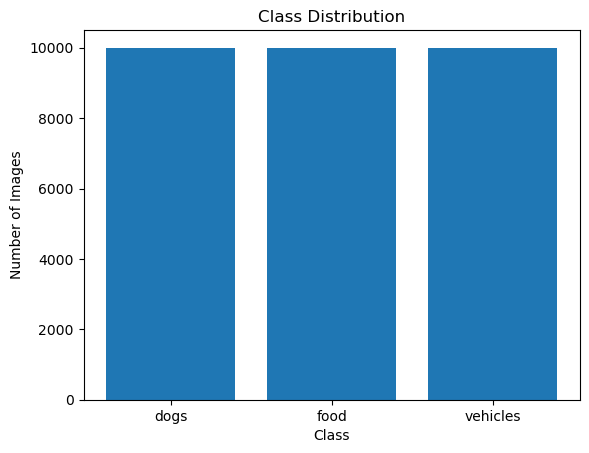

In [22]:
# Path to the dataset folders
data_dir = '/Users/deepakrajmohanraj/Desktop/UB/Assignments/Spring 2023/CSE 574/Assignment 2/cnn_dataset/'

# Count the number of images in each class
classes = ['dogs', 'food', 'vehicles']
class_counts = []
for cls in classes:
    cls_dir = os.path.join(data_dir, cls)
    class_counts.append(len(os.listdir(cls_dir)))

# Plot the class distribution as a bar chart
plt.bar(classes, class_counts)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


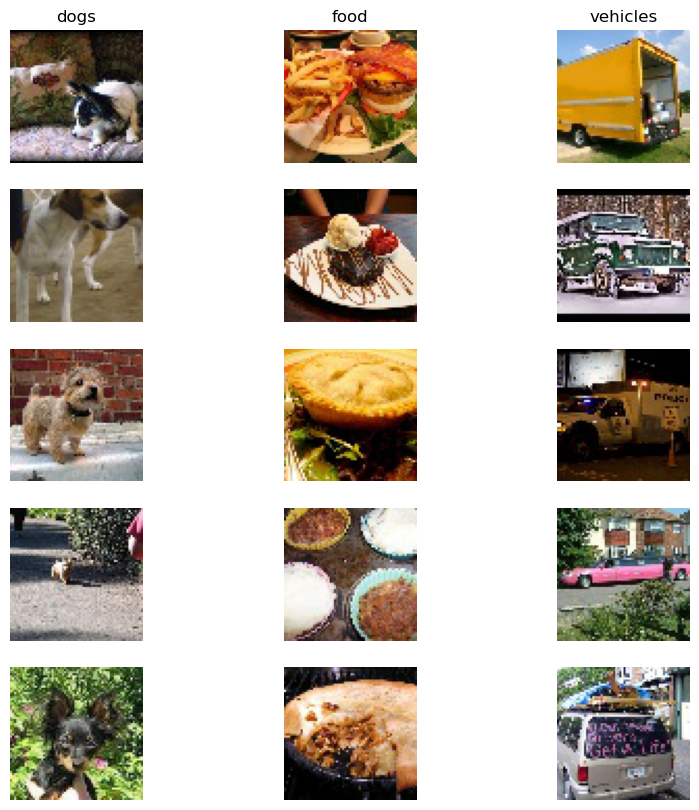

In [3]:
import random
from matplotlib.image import imread

# Set the number of images to display from each class
num_images_per_class = 5

# Create a grid of randomly selected images from each class
fig, axs = plt.subplots(nrows=num_images_per_class, ncols=len(classes), figsize=(10, 10))
for i, cls in enumerate(classes):
    cls_dir = os.path.join(data_dir, cls)
    img_files = os.listdir(cls_dir)
    for j in range(num_images_per_class):
        img_file = random.choice(img_files)
        img_path = os.path.join(cls_dir, img_file)
        img = imread(img_path)
        axs[j, i].imshow(img)
        axs[j, i].axis('off')
        if j == 0:
            axs[j, i].set_title(cls)
plt.show()


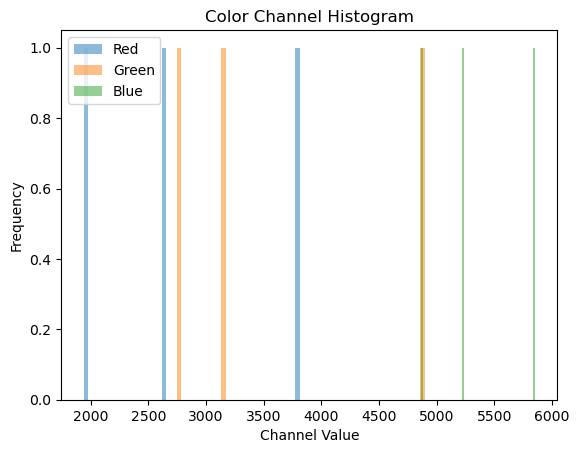

In [16]:
import os
import matplotlib.pyplot as plt
from skimage import io, color

# Calculate the color distribution for each category
colors = []
for category in categories:
    category_dir = os.path.join(data_dir, category)
    images = os.listdir(category_dir)
    color_counts = [0, 0, 0]
    for image in images:
        image_path = os.path.join(category_dir, image)
        img = io.imread(image_path)
        img = color.rgb2hsv(img)
        color_counts += img.mean(axis=(0,1))
    colors.append(color_counts)

# Create a histogram of the color channels
colors = np.array(colors)
plt.hist(colors[:, 0], bins=50, alpha=0.5, label='Red')
plt.hist(colors[:, 1], bins=50, alpha=0.5, label='Green')
plt.hist(colors[:, 2], bins=50, alpha=0.5, label='Blue')
plt.title('Color Channel Histogram')
plt.xlabel('Channel Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [11]:
# Performing one hot encoding to the target variables into 3 classes
from tensorflow.keras.utils import to_categorical

y = to_categorical(y, num_classes=3)

In [12]:
# Split data into training and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=9)

# Split training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15/.85, random_state=9)

In [13]:
# Printing the shape of training, validation and testing data along with mean and SD of pixels of the images
print('Training data shape:', X_train.shape)
print('Validation data shape:', X_val.shape)
print('Testing data shape:', X_test.shape)
print('Mean of pixel values:', np.mean(X))
print('Standard deviation of pixel values:', np.std(X))

Training data shape: (21000, 224, 224, 3)
Validation data shape: (4500, 224, 224, 3)
Testing data shape: (4500, 224, 224, 3)
Mean of pixel values: 0.4458519
Standard deviation of pixel values: 0.2668456


In [14]:
# Converting the target variable into float, to align with the input variable data types
y_train = np.asarray(y_train).astype('float32')
y_val = np.asarray(y_val).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [15]:
# Grouping the training, test and validation data into tuples
training_data = (X_train, y_train)
validation_data = (X_val, y_val)
test_data = (X_test, y_test)

# Printing the shape of the training, test and validation data 
print(len(training_data), len(validation_data), len(test_data))
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

2 2 2
(21000, 224, 224, 3) (21000, 3)
(4500, 224, 224, 3) (4500, 3)
(4500, 224, 224, 3) (4500, 3)


### STEP 2 - Build and train an AlexNet CNN architecture

In [16]:
# Importing the libraries required for building the AlexNet CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, ZeroPadding2D

def build_model():

  # Defining the input shape of the image
  input_shape = (224, 224, 3)

  # Defining the model
  model = Sequential()

  # Adding the convolutional layers
  model.add(Conv2D(96, (11, 11), strides=(4, 4), padding='valid', activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
    
  model.add(ZeroPadding2D(padding=(2, 2)))
  model.add(Conv2D(256, (5, 5), strides=(1, 1), padding='valid', activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

  # Flattening the output from the convolutional layers
  model.add(Flatten())

  # Adding the fully connected layers
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(3, activation='softmax'))

  return model

def train_model(model, x_train, y_train, epochs, batch_size, optimizer, loss_fn, validation_data):
  num_batches = len(x_train) // batch_size
  training_losses = []
  training_accuracies = []
  val_losses = []
  val_accuracies = []
  
  start_time = time.time()
  
  for epoch in range(epochs):
      
    epoch_loss = 0
    epoch_accuracy = 0
    
    for batch in range(num_batches):
      start_idx = batch * batch_size
      end_idx = (batch + 1) * batch_size
      x_batch = x_train[start_idx:end_idx]
      y_batch = y_train[start_idx:end_idx]
      y_batch = np.asarray(y_batch).astype('float32')
      
      loss_value, accuracy, model = optimize(optimizer, loss_fn, x_batch, y_batch, model)
      
      epoch_loss += loss_value
      epoch_accuracy += accuracy
        
    # Calculate average epoch loss and accuracy
    epoch_loss /= num_batches
    epoch_accuracy /= num_batches     
    
    # Evaluate the model on the validation data
    val_loss, val_accuracy = model_validate(model, loss_fn, validation_data[0], validation_data[1])
    
    print(f"Epoch {epoch+1}: training_loss = {epoch_loss}, val_loss = {val_loss}, training_acc = {epoch_accuracy}, val_acc = {val_accuracy}")
    
    training_losses.append(epoch_loss)
    training_accuracies.append(epoch_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

  stop_time = time.time()
  elapsed_time = (stop_time - start_time) / 60
  
  # plotting Accuracy vs epochs for training and validation sets
  epochs = [x for x in range(1,epochs + 1)]
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  
  ax1.set_title(f'Accuracy vs epochs')
  ax1.plot(epochs, training_accuracies, 'b', label='Training accuracy')
  ax1.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Accuracy')
  ax1.legend()
  
  # plotting Losses vs epochs for training and validation sets
  ax2.set_title(f'Losses vs epochs')
  ax2.plot(epochs, training_losses, 'b', label='Training losses')
  ax2.plot(epochs, val_losses, 'r', label='Validation losses')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Losses')
  ax2.legend()
  
  plt.show()
  
  return model, elapsed_time

def optimize(optimizer, loss_func, x, y, model):
  with tf.GradientTape() as tape:
    logits = model(x,training=True)
    loss = loss_func(y, logits)           
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(grads_and_vars = zip(gradients, model.trainable_variables), name=None)
  preds = tf.round(logits)
  accuracy = tf.reduce_mean(tf.cast(tf.equal(preds, y), tf.float32))
  return loss, accuracy, model

def model_validate(model, loss_func, x_val, y_val):
  logits = model(x_val)
  val_loss = loss_func(y_val, logits)
  preds = tf.round(logits)
  val_accuracy = tf.reduce_mean(tf.cast(tf.equal(preds, y_val), tf.float32))
  
  return val_loss, val_accuracy


def model_test(model, loss_func, x_test, y_test):
  logits = model(x_test)
  test_loss = loss_func(y_test, logits)
  y_pred = tf.round(logits)
  
  test_accuracy = tf.reduce_mean(tf.cast(tf.equal(y_pred, y_test), tf.float32))
  
  print("Test loss: {}, Test accuracy: {}".format(test_loss, test_accuracy))
  
  return test_loss, test_accuracy


### STEP 3 - Train the network and evaluate the performance of the AlexNet on the testing data

/usr/lib/python3/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Epoch 1: training_loss = 0.8885394930839539, val_loss = 0.6378164291381836, training_acc = 0.7377732992172241, val_acc = 0.8283703923225403
Epoch 2: training_loss = 0.5618889331817627, val_loss = 0.5077018141746521, training_acc = 0.8482913374900818, val_acc = 0.865407407283783
Epoch 3: training_loss = 0.4752149283885956, val_loss = 0.41986602544784546, training_acc = 0.8746506571769714, val_acc = 0.892370343208313
Epoch 4: training_loss = 0.4020477831363678, val_loss = 0.33586785197257996, training_acc = 0.8956743478775024, val_acc = 0.9173333048820496
Epoch 5: training_loss = 0.36116352677345276, val_loss = 0.30716627836227417, training_acc = 0.9066787362098694, val_acc = 0.9224444627761841
Epoch 6: training_loss = 0.3297651708126068, val_loss = 0.3188536465167999, training_acc = 0.9158094525337219, val_acc = 0.9191111326217651
Epoch 7: training_loss = 0.3217776417732239, val_loss = 0.3035431504249573, training_acc = 0.9183022975921631, val_acc = 0.9232592582702637
Epoch 8: training_

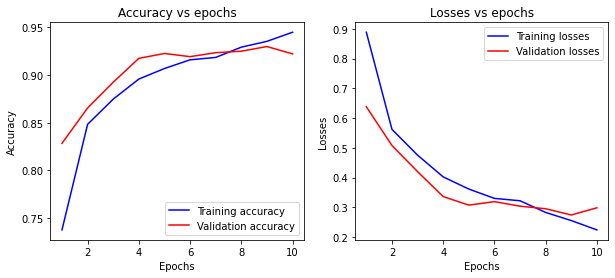

Test loss: 0.3079577088356018, Test accuracy: 0.9228888750076294
Model training time: 2.187324285507202


In [18]:
             
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

loss_func = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
epochs = 10
batch_size = 128
    
model = build_model()
trained_model, train_time = train_model(model, training_data[0], training_data[1], epochs, batch_size, optimizer, 
                            loss_func, validation_data)
loss, accuracy = model_test(trained_model, loss_func, test_data[0], test_data[1])

print(f"Model training time: {train_time}")

### STEP 4 and STEP 5 - Modifying the AlexNet structure and training the network and evaluating the performance of the AlexNet on the testing data.

#### a. Adding one Conv2D layer with 256 filters to the original AlexNet structure

Epoch 1: training_loss = 1.0824904441833496, val_loss = 1.0350714921951294, training_acc = 0.668826162815094, val_acc = 0.7074815034866333
Epoch 2: training_loss = 0.7362527847290039, val_loss = 0.613642692565918, training_acc = 0.7889673113822937, val_acc = 0.8183703422546387
Epoch 3: training_loss = 0.5587626099586487, val_loss = 0.5502751469612122, training_acc = 0.8467669486999512, val_acc = 0.8569629788398743
Epoch 4: training_loss = 0.5064746737480164, val_loss = 0.4539526402950287, training_acc = 0.8633286952972412, val_acc = 0.8851110935211182
Epoch 5: training_loss = 0.4450114071369171, val_loss = 0.4141708314418793, training_acc = 0.8826536536216736, val_acc = 0.89340740442276
Epoch 6: training_loss = 0.3944409191608429, val_loss = 0.4004521071910858, training_acc = 0.8968814015388489, val_acc = 0.896740734577179
Epoch 7: training_loss = 0.36441680788993835, val_loss = 0.3667682409286499, training_acc = 0.9078696370124817, val_acc = 0.9065185189247131
Epoch 8: training_loss =

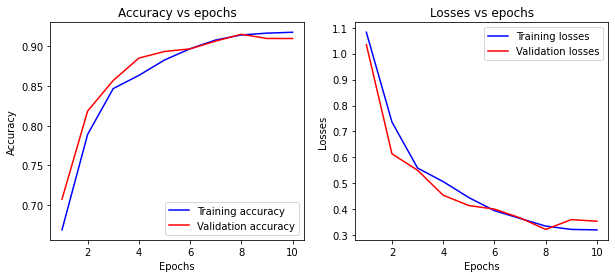

Test loss: 0.3729432225227356, Test accuracy: 0.9069629907608032
Model training time: 2.448060707251231


In [19]:
def build_model():

  # Define the input shape
  input_shape = (224, 224, 3)

  # Define the model
  model = Sequential()

  # Add the convolutional layers
  model.add(Conv2D(96, (11, 11), strides=(4, 4), padding='valid', activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
    
  model.add(ZeroPadding2D(padding=(2, 2)))
  model.add(Conv2D(256, (5, 5), strides=(1, 1), padding='valid', activation='relu'))
  
  # Adding one Conv2D layer from the AlexNet
  model.add(Conv2D(256, (5, 5), strides=(1, 1), padding='valid', activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

  # Flatten the output from the convolutional layers
  model.add(Flatten())

  # Add the fully connected layers
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(3, activation='softmax'))

  return model

             
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

loss_func = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
epochs = 10
batch_size = 128
    
model = build_model()
trained_model, train_time = train_model(model, training_data[0], training_data[1], epochs, batch_size, optimizer, 
                            loss_func, validation_data)
loss, accuracy = model_test(trained_model, loss_func, test_data[0], test_data[1])

print(f"Model training time: {train_time}")

#### b. Adding one Conv2D layer with 384 filters to the original AlexNet structure

Epoch 1: training_loss = 0.9574562907218933, val_loss = 0.6582648158073425, training_acc = 0.7082222700119019, val_acc = 0.8184444308280945
Epoch 2: training_loss = 0.6469751000404358, val_loss = 0.49225711822509766, training_acc = 0.8226308822631836, val_acc = 0.8758518695831299
Epoch 3: training_loss = 0.5178420543670654, val_loss = 0.4752084016799927, training_acc = 0.8651230335235596, val_acc = 0.8772592544555664
Epoch 4: training_loss = 0.43970727920532227, val_loss = 0.3666419982910156, training_acc = 0.8867981433868408, val_acc = 0.9066666960716248
Epoch 5: training_loss = 0.3941545784473419, val_loss = 0.34723713994026184, training_acc = 0.899215579032898, val_acc = 0.910444438457489
Epoch 6: training_loss = 0.35599422454833984, val_loss = 0.35170039534568787, training_acc = 0.9096641540527344, val_acc = 0.9088888764381409
Epoch 7: training_loss = 0.32307907938957214, val_loss = 0.28752219676971436, training_acc = 0.9181116819381714, val_acc = 0.9278518557548523
Epoch 8: traini

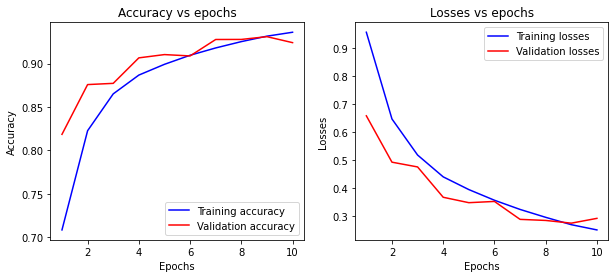

Test loss: 0.2822440564632416, Test accuracy: 0.9289629459381104
Model training time: 2.059854197502136


In [20]:
def build_model():

  # Define the input shape
  input_shape = (224, 224, 3)

  # Define the model
  model = Sequential()

  # Add the convolutional layers
  model.add(Conv2D(96, (11, 11), strides=(4, 4), padding='valid', activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
    
  model.add(ZeroPadding2D(padding=(2, 2)))
  model.add(Conv2D(256, (5, 5), strides=(1, 1), padding='valid', activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

  # Flatten the output from the convolutional layers
  model.add(Flatten())

  # Add the fully connected layers
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(3, activation='softmax'))

  return model

             
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

loss_func = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
epochs = 10
batch_size = 128
    
model = build_model()
trained_model, train_time = train_model(model, training_data[0], training_data[1], epochs, batch_size, optimizer, 
                            loss_func, validation_data)
loss, accuracy = model_test(trained_model, loss_func, test_data[0], test_data[1])

print(f"Model training time: {train_time}")

#### c. Removing a dropout layer before the final dense layer

Epoch 1: training_loss = 0.9704163074493408, val_loss = 0.7340692281723022, training_acc = 0.7098739147186279, val_acc = 0.793925940990448
Epoch 2: training_loss = 0.5832987427711487, val_loss = 0.5487722754478455, training_acc = 0.8451632261276245, val_acc = 0.8508889079093933
Epoch 3: training_loss = 0.5048627853393555, val_loss = 0.4381425678730011, training_acc = 0.8655678629875183, val_acc = 0.8872592449188232
Epoch 4: training_loss = 0.43329349160194397, val_loss = 0.38585686683654785, training_acc = 0.8847974538803101, val_acc = 0.9037036895751953
Epoch 5: training_loss = 0.3934815227985382, val_loss = 0.36212530732154846, training_acc = 0.8982787728309631, val_acc = 0.9080740809440613
Epoch 6: training_loss = 0.3665842115879059, val_loss = 0.36185726523399353, training_acc = 0.9066789150238037, val_acc = 0.9071111083030701
Epoch 7: training_loss = 0.3351047933101654, val_loss = 0.3806479573249817, training_acc = 0.9151580333709717, val_acc = 0.902222216129303
Epoch 8: training_

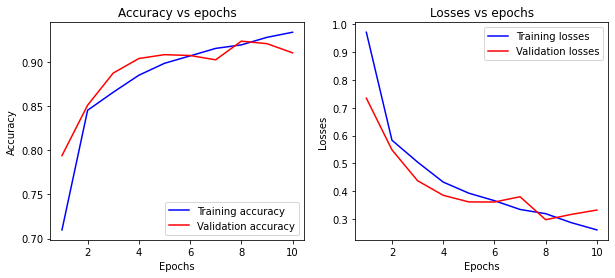

Test loss: 0.33264246582984924, Test accuracy: 0.9176296591758728
Model training time: 1.865519909063975


In [21]:
def build_model():

  # Define the input shape
  input_shape = (224, 224, 3)

  # Define the model
  model = Sequential()

  # Add the convolutional layers
  model.add(Conv2D(96, (11, 11), strides=(4, 4), padding='valid', activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
    
  model.add(ZeroPadding2D(padding=(2, 2)))
  model.add(Conv2D(256, (5, 5), strides=(1, 1), padding='valid', activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

  # Flatten the output from the convolutional layers
  model.add(Flatten())

  # Add the fully connected layers
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(4096, activation='relu'))
  model.add(Dense(3, activation='softmax'))

  return model

             
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

loss_func = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
epochs = 10
batch_size = 128
    
model = build_model()
trained_model, train_time = train_model(model, training_data[0], training_data[1], epochs, batch_size, optimizer, 
                            loss_func, validation_data)
loss, accuracy = model_test(trained_model, loss_func, test_data[0], test_data[1])

print(f"Model training time: {train_time}")

#### d. Modifying the optimizer from SGD to Adam to the original AlexNet structure

Epoch 1: training_loss = 0.9641141295433044, val_loss = 0.5753284096717834, training_acc = 0.7317866683006287, val_acc = 0.8465926051139832
Epoch 2: training_loss = 0.5263936519622803, val_loss = 0.43593353033065796, training_acc = 0.8615982532501221, val_acc = 0.8833333253860474
Epoch 3: training_loss = 0.4432760179042816, val_loss = 0.38487914204597473, training_acc = 0.8860677480697632, val_acc = 0.9001481533050537
Epoch 4: training_loss = 0.390278697013855, val_loss = 0.3741738498210907, training_acc = 0.8989295959472656, val_acc = 0.9036296010017395
Epoch 5: training_loss = 0.37173184752464294, val_loss = 0.3327472507953644, training_acc = 0.9039000272750854, val_acc = 0.9142962694168091
Epoch 6: training_loss = 0.33541443943977356, val_loss = 0.32897302508354187, training_acc = 0.9139672517776489, val_acc = 0.9162963032722473
Epoch 7: training_loss = 0.32238292694091797, val_loss = 0.34908321499824524, training_acc = 0.9195408821105957, val_acc = 0.9117777943611145
Epoch 8: train

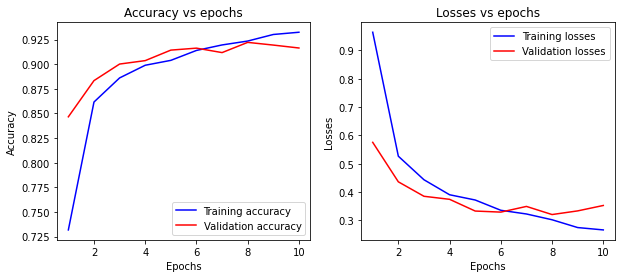

Test loss: 0.3917558193206787, Test accuracy: 0.9114074110984802
Model training time: 1.8692648609479268


In [22]:
def build_model():

  # Define the input shape
  input_shape = (224, 224, 3)

  # Define the model
  model = Sequential()

  # Add the convolutional layers
  model.add(Conv2D(96, (11, 11), strides=(4, 4), padding='valid', activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
    
  model.add(ZeroPadding2D(padding=(2, 2)))
  model.add(Conv2D(256, (5, 5), strides=(1, 1), padding='valid', activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

  # Flatten the output from the convolutional layers
  model.add(Flatten())

  # Add the fully connected layers
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(3, activation='softmax'))

  return model

             
optimizer = tf.keras.optimizers.Adam()

loss_func = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
epochs = 10
batch_size = 128
    
model = build_model()
trained_model, train_time = train_model(model, training_data[0], training_data[1], epochs, batch_size, optimizer, 
                            loss_func, validation_data)
loss, accuracy = model_test(trained_model, loss_func, test_data[0], test_data[1])

print(f"Model training time: {train_time}")

#### e. Modifying the activation function from relu to tanh to the original AlexNet structure

Epoch 1: training_loss = 6.87683629989624, val_loss = 9.147369384765625, training_acc = 0.564532458782196, val_acc = 0.5506666898727417
Epoch 2: training_loss = 19.660736083984375, val_loss = 32.5703239440918, training_acc = 0.555846631526947, val_acc = 0.5506666898727417
Epoch 3: training_loss = 18.554500579833984, val_loss = 13.999813079833984, training_acc = 0.5583238005638123, val_acc = 0.5506666898727417
Epoch 4: training_loss = 15.671858787536621, val_loss = 8.073996543884277, training_acc = 0.5549575090408325, val_acc = 0.5594074130058289
Epoch 5: training_loss = 17.020626068115234, val_loss = 13.831318855285645, training_acc = 0.5602927207946777, val_acc = 0.5594074130058289
Epoch 6: training_loss = 17.17544937133789, val_loss = 5.4618754386901855, training_acc = 0.5596098303794861, val_acc = 0.556592583656311
Epoch 7: training_loss = 15.286605834960938, val_loss = 11.125027656555176, training_acc = 0.5543699264526367, val_acc = 0.5506666898727417
Epoch 8: training_loss = 14.81

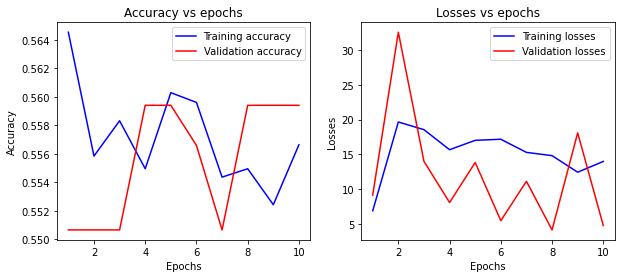

Test loss: 4.928247451782227, Test accuracy: 0.5548148155212402
Model training time: 1.8673161506652831


In [23]:
def build_model():

  # Define the input shape
  input_shape = (224, 224, 3)

  # Define the model
  model = Sequential()

  # Add the convolutional layers
  model.add(Conv2D(96, (11, 11), strides=(4, 4), padding='valid', activation='tanh', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
    
  model.add(ZeroPadding2D(padding=(2, 2)))
  model.add(Conv2D(256, (5, 5), strides=(1, 1), padding='valid', activation='tanh'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='tanh'))
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='tanh'))
  model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='tanh'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

  # Flatten the output from the convolutional layers
  model.add(Flatten())

  # Add the fully connected layers
  model.add(Dense(4096, activation='tanh'))
  model.add(Dropout(0.5))
  model.add(Dense(4096, activation='tanh'))
  model.add(Dropout(0.5))
  model.add(Dense(3, activation='softmax'))

  return model

             
optimizer = tf.keras.optimizers.SGD(momentum = 0.9)

loss_func = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
epochs = 10
batch_size = 128
    
model = build_model()
trained_model, train_time = train_model(model, training_data[0], training_data[1], epochs, batch_size, optimizer, 
                            loss_func, validation_data)
loss, accuracy = model_test(trained_model, loss_func, test_data[0], test_data[1])

print(f"Model training time: {train_time}")

#### f. Modifying the learning rate of SGD from default(0.001) to 0.01 to the original AlexNet structure

Epoch 1: training_loss = 1.0219106674194336, val_loss = 0.7544153928756714, training_acc = 0.6903265118598938, val_acc = 0.7855555415153503
Epoch 2: training_loss = 0.6308400630950928, val_loss = 0.5129123330116272, training_acc = 0.8282679319381714, val_acc = 0.8605185151100159
Epoch 3: training_loss = 0.5066011548042297, val_loss = 0.46571993827819824, training_acc = 0.8649169206619263, val_acc = 0.8737778067588806
Epoch 4: training_loss = 0.4458567798137665, val_loss = 0.396767795085907, training_acc = 0.8840988874435425, val_acc = 0.8992592692375183
Epoch 5: training_loss = 0.40148741006851196, val_loss = 0.3847782611846924, training_acc = 0.8968974947929382, val_acc = 0.9025925993919373
Epoch 6: training_loss = 0.3759404122829437, val_loss = 0.36133381724357605, training_acc = 0.9048528075218201, val_acc = 0.9052592515945435
Epoch 7: training_loss = 0.3407687544822693, val_loss = 0.34557831287384033, training_acc = 0.9130939245223999, val_acc = 0.9103703498840332
Epoch 8: training

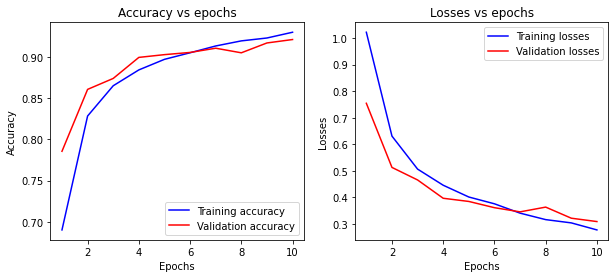

Test loss: 0.30878904461860657, Test accuracy: 0.9214074015617371
Model training time: 1.9035714983940124


In [24]:
def build_model():

  # Define the input shape
  input_shape = (224, 224, 3)

  # Define the model
  model = Sequential()

  # Add the convolutional layers
  model.add(Conv2D(96, (11, 11), strides=(4, 4), padding='valid', activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

  model.add(Conv2D(256, (5, 5), strides=(1, 1), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

  # Flatten the output from the convolutional layers
  model.add(Flatten())

  # Add the fully connected layers
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(3, activation='softmax'))

  return model

             
optimizer = tf.keras.optimizers.SGD(momentum = 0.9, learning_rate=0.01)

loss_func = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
epochs = 10
batch_size = 128
    
model = build_model()
trained_model, train_time = train_model(model, training_data[0], training_data[1], epochs, batch_size, optimizer, 
                            loss_func, validation_data)
loss, accuracy = model_test(trained_model, loss_func, test_data[0], test_data[1])

print(f"Model training time: {train_time}")

#### g. Removing zero padding layer from the original AlexNet structure¶

Epoch 1: training_loss = 0.9267962574958801, val_loss = 0.6803982257843018, training_acc = 0.720703125, val_acc = 0.8091852068901062
Epoch 2: training_loss = 0.5874620079994202, val_loss = 0.47495731711387634, training_acc = 0.840494692325592, val_acc = 0.8754814863204956
Epoch 3: training_loss = 0.4915083050727844, val_loss = 0.45163771510124207, training_acc = 0.8682991862297058, val_acc = 0.8867407441139221
Epoch 4: training_loss = 0.42417848110198975, val_loss = 0.3785371780395508, training_acc = 0.8887989521026611, val_acc = 0.903333306312561
Epoch 5: training_loss = 0.37499910593032837, val_loss = 0.3339836895465851, training_acc = 0.904423713684082, val_acc = 0.9182962775230408
Epoch 6: training_loss = 0.3443988561630249, val_loss = 0.31035116314888, training_acc = 0.9124109148979187, val_acc = 0.9227407574653625
Epoch 7: training_loss = 0.3190418779850006, val_loss = 0.3095525801181793, training_acc = 0.9199694991111755, val_acc = 0.9235555529594421
Epoch 8: training_loss = 0.2

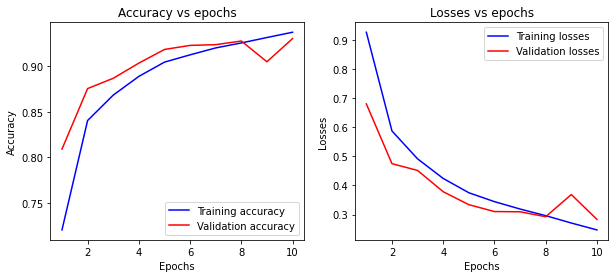

Test loss: 0.29099518060684204, Test accuracy: 0.9261481761932373
Model training time: 1.7871741334597269


In [25]:
def build_model():

  # Define the input shape
  input_shape = (224, 224, 3)

  # Define the model
  model = Sequential()

  # Add the convolutional layers
  model.add(Conv2D(96, (11, 11), strides=(4, 4), padding='valid', activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

  model.add(Conv2D(256, (5, 5), strides=(1, 1), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

  # Flatten the output from the convolutional layers
  model.add(Flatten())

  # Add the fully connected layers
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(3, activation='softmax'))

  return model

             
optimizer = tf.keras.optimizers.SGD(momentum = 0.9)

loss_func = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
epochs = 10
batch_size = 128
    
model = build_model()
trained_model, train_time = train_model(model, training_data[0], training_data[1], epochs, batch_size, optimizer, 
                            loss_func, validation_data)
loss, accuracy = model_test(trained_model, loss_func, test_data[0], test_data[1])

print(f"Model training time: {train_time}")

#### h. Implementing Early Stopping with adding a Conv2D(384) to the original AlexNet structure¶

/usr/lib/python3/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Epoch 1: training_loss = 0.891910195350647, val_loss = 0.6643350720405579, training_acc = 0.7353752851486206, val_acc = 0.812666654586792
Epoch 2: training_loss = 0.5643172264099121, val_loss = 0.4493529498577118, training_acc = 0.849482536315918, val_acc = 0.8819259405136108
Epoch 3: training_loss = 0.4751347303390503, val_loss = 0.46340397000312805, training_acc = 0.8744757771492004, val_acc = 0.8830370306968689
Epoch 4: training_loss = 0.42023375630378723, val_loss = 0.3782099783420563, training_acc = 0.8905775547027588, val_acc = 0.9043703675270081
Epoch 5: training_loss = 0.381195068359375, val_loss = 0.36676493287086487, training_acc = 0.9018670916557312, val_acc = 0.9035555720329285
Epoch 6: training_loss = 0.34074273705482483, val_loss = 0.31717926263809204, training_acc = 0.9129669666290283, val_acc = 0.9188148379325867
Epoch 7: training_loss = 0.3016747832298279, val_loss = 0.3368667662143707, training_acc = 0.9234312772750854, val_acc = 0.9115555286407471
Epoch 8: training_l

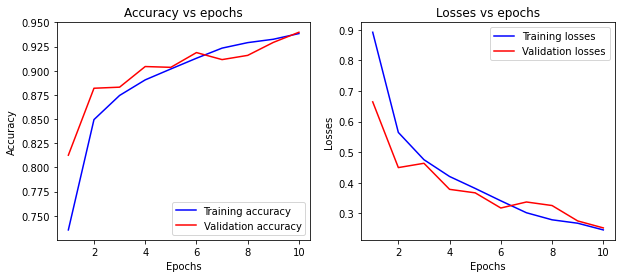

Test loss: 0.2611059546470642, Test accuracy: 0.9368888735771179
Model training time: 2.4083727995554605


In [17]:
def train_model(model, x_train, y_train, epochs, batch_size, optimizer, loss_fn, validation_data, earlystopping_metric,patience):
  num_batches = len(x_train) // batch_size
  training_losses = []
  training_accuracies = []
  val_losses = []
  val_accuracies = []
  
  start_time = time.time()
  
  for epoch in range(epochs):
      
    epoch_loss = 0
    epoch_accuracy = 0
    
    for batch in range(num_batches):
      start_idx = batch * batch_size
      end_idx = (batch + 1) * batch_size
      x_batch = x_train[start_idx:end_idx]
      y_batch = y_train[start_idx:end_idx]
      y_batch = np.asarray(y_batch).astype('float32')
      
      loss_value, accuracy, model = optimize(optimizer, loss_fn, x_batch, y_batch, model)
      
      epoch_loss += loss_value
      epoch_accuracy += accuracy
        
    # Calculate average epoch loss and accuracy
    epoch_loss /= num_batches
    epoch_accuracy /= num_batches     
    
    # Evaluate the model on the validation data
    val_loss, val_accuracy = model_validate(model, loss_fn, validation_data[0], validation_data[1])
    
    # Early stopping implementation
    if earlystopping_metric == 'loss':
        # early stopping on validation loss
        if epoch > 0 and val_loss >= min(val_losses):
            counter += 1
            if counter == patience:
                print(f'early stopping patience reached {patience}.')
                break
        else: 
            counter = 0

    elif earlystopping_metric == 'accuracy':
        # early stopping on validation accuracy
        if epoch > 0 and val_accuracy <= max(val_accuracies):
            counter += 1
            if counter == patience:
                print(f'early stopping patience reached {patience}.')
                break
        else:
            counter = 0

    print(f"Epoch {epoch+1}: training_loss = {epoch_loss}, val_loss = {val_loss}, training_acc = {epoch_accuracy}, val_acc = {val_accuracy}")
    
    training_losses.append(epoch_loss)
    training_accuracies.append(epoch_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

  stop_time = time.time()
  elapsed_time = (stop_time - start_time) / 60
  
  # plotting Accuracy vs epochs for training and validation sets
  epochs = [x for x in range(1,epochs + 1)]
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  
  ax1.set_title(f'Accuracy vs epochs')
  ax1.plot(epochs, training_accuracies, 'b', label='Training accuracy')
  ax1.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Accuracy')
  ax1.legend()
  
  # plotting Losses vs epochs for training and validation sets
  ax2.set_title(f'Losses vs epochs')
  ax2.plot(epochs, training_losses, 'b', label='Training losses')
  ax2.plot(epochs, val_losses, 'r', label='Validation losses')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Losses')
  ax2.legend()
  
  plt.show()
  
  return model, elapsed_time

def build_model():

  # Define the input shape
  input_shape = (224, 224, 3)

  # Define the model
  model = Sequential()

  # Add the convolutional layers
  model.add(Conv2D(96, (11, 11), strides=(4, 4), padding='valid', activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
    
  model.add(ZeroPadding2D(padding=(2, 2)))
  model.add(Conv2D(256, (5, 5), strides=(1, 1), padding='valid', activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

  # Flatten the output from the convolutional layers
  model.add(Flatten())

  # Add the fully connected layers
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(3, activation='softmax'))

  return model

optimizer = tf.keras.optimizers.SGD(momentum=0.9)

loss_func = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
epochs = 10
batch_size = 128
    
model = build_model()
trained_model, train_time = train_model(model, training_data[0], training_data[1], epochs, batch_size, optimizer, 
                            loss_func, validation_data, earlystopping_metric="loss", patience = 5)
loss, accuracy = model_test(trained_model, loss_func, test_data[0], test_data[1])

print(f"Model training time: {train_time}")

#### i. Adding multiple Conv2D layers with filters 384 and 256 to the original AlexNet structure and changing the dropout from 0.5 to 0.4¶

Epoch 1: training_loss = 1.0395197868347168, val_loss = 0.76385897397995, training_acc = 0.6807669997215271, val_acc = 0.7692592740058899
Epoch 2: training_loss = 0.7390722036361694, val_loss = 0.5510943531990051, training_acc = 0.7864742875099182, val_acc = 0.8524444699287415
Epoch 3: training_loss = 0.5689452290534973, val_loss = 0.5428581237792969, training_acc = 0.8436549305915833, val_acc = 0.8545926213264465
Epoch 4: training_loss = 0.4954197108745575, val_loss = 0.4539959728717804, training_acc = 0.8661075830459595, val_acc = 0.8811851739883423
Epoch 5: training_loss = 0.4461284279823303, val_loss = 0.4725741147994995, training_acc = 0.8801130056381226, val_acc = 0.8765925765037537
Epoch 6: training_loss = 0.42920154333114624, val_loss = 0.41859814524650574, training_acc = 0.8878458738327026, val_acc = 0.8919259309768677
Epoch 7: training_loss = 0.3913111388683319, val_loss = 0.43537402153015137, training_acc = 0.8983899354934692, val_acc = 0.890666663646698
Epoch 8: training_lo

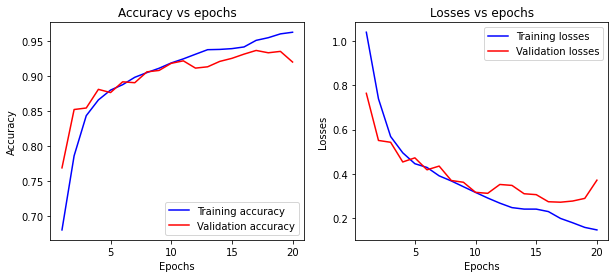

Test loss: 0.4011322557926178, Test accuracy: 0.9142962694168091
Model training time: 4.62655710776647


In [18]:
def build_model():

  # Define the input shape
  input_shape = (224, 224, 3)

  # Define the model
  model = Sequential()

  # Add the convolutional layers
  model.add(Conv2D(96, (11, 11), strides=(4, 4), padding='valid', activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
    
  model.add(ZeroPadding2D(padding=(2, 2)))
  model.add(Conv2D(256, (5, 5), strides=(1, 1), padding='valid', activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

  # Flatten the output from the convolutional layers
  model.add(Flatten())

  # Add the fully connected layers
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(3, activation='softmax'))

  return model

             
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

loss_func = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
epochs = 20
batch_size = 128
    
model = build_model()
trained_model, train_time = train_model(model, training_data[0], training_data[1], epochs, batch_size, optimizer, 
                            loss_func, validation_data, earlystopping_metric="loss", patience = 5)
loss, accuracy = model_test(trained_model, loss_func, test_data[0], test_data[1])

print(f"Model training time: {train_time}")

#### j. Implementing Batch Normalization along with Early Stopping while training the model along with adding an additional dropout layer and couple of Conv2D layers

Epoch 1: training_loss = 0.5502574443817139, val_loss = 0.8392687439918518, training_acc = 0.8558976054191589, val_acc = 0.7729629874229431
Epoch 2: training_loss = 0.3843892514705658, val_loss = 0.5422567129135132, training_acc = 0.9037253856658936, val_acc = 0.8345925807952881
Epoch 3: training_loss = 0.32377898693084717, val_loss = 1.3592947721481323, training_acc = 0.9207475185394287, val_acc = 0.7025926113128662
Epoch 4: training_loss = 0.27321895956993103, val_loss = 0.4888896346092224, training_acc = 0.9327204823493958, val_acc = 0.8850370645523071
Epoch 5: training_loss = 0.2395738959312439, val_loss = 0.9705066084861755, training_acc = 0.9409776329994202, val_acc = 0.7619259357452393
Epoch 6: training_loss = 0.21074225008487701, val_loss = 0.5695576667785645, training_acc = 0.9481390714645386, val_acc = 0.8636296391487122
Epoch 7: training_loss = 0.18352755904197693, val_loss = 0.4207890033721924, training_acc = 0.9549353122711182, val_acc = 0.8969629406929016
Epoch 8: trainin

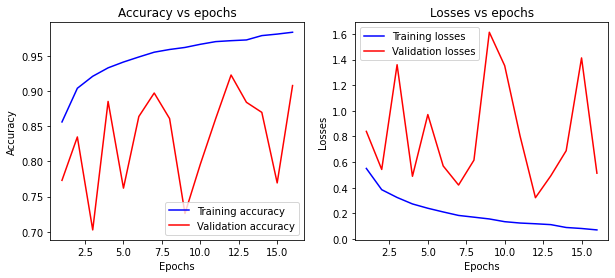

Test loss: 0.3391075134277344, Test accuracy: 0.9434815049171448
Model training time: 4.537593805789948


In [22]:
def train_model(model, x_train, y_train, epochs, batch_size, optimizer, loss_fn, validation_data, earlystopping_metric,patience):
  num_batches = len(x_train) // batch_size
  training_losses = []
  training_accuracies = []
  val_losses = []
  val_accuracies = []
  
  start_time = time.time()
  
  for epoch in range(epochs):
      
    epoch_loss = 0
    epoch_accuracy = 0
            
    for batch in range(num_batches):
      start_idx = batch * batch_size
      end_idx = (batch + 1) * batch_size
      x_batch = x_train[start_idx:end_idx]
      y_batch = y_train[start_idx:end_idx]
      y_batch = np.asarray(y_batch).astype('float32')
      
      loss_value, accuracy, model = optimize(optimizer, loss_fn, x_batch, y_batch, model)
      epoch_loss += loss_value
      epoch_accuracy += accuracy
        
    # Calculate average epoch loss and accuracy
    epoch_loss /= num_batches
    epoch_accuracy /= num_batches     
    
    # Evaluate the model on the validation data
    val_loss, val_accuracy = model_validate(model, loss_fn, validation_data[0], validation_data[1])
    
    # Early stopping implementation
    if earlystopping_metric == 'loss':
        # early stopping on validation loss
        if epoch > 0 and val_loss >= min(val_losses):
            counter += 1
            if counter == patience:
                print(f'early stopping patience reached {patience}.')
                break
        else: 
            counter = 0

    elif earlystopping_metric == 'accuracy':
        # early stopping on validation accuracy
        if epoch > 0 and val_accuracy <= max(val_accuracies):
            counter += 1
            if counter == patience:
                print(f'early stopping patience reached {patience}.')
                break
        else:
            counter = 0

    print(f"Epoch {epoch+1}: training_loss = {epoch_loss}, val_loss = {val_loss}, training_acc = {epoch_accuracy}, val_acc = {val_accuracy}")
    
    training_losses.append(epoch_loss)
    training_accuracies.append(epoch_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

  stop_time = time.time()
  elapsed_time = (stop_time - start_time) / 60
  
  # plotting Accuracy vs epochs for training and validation sets
  x = [x for x in range(1,len(training_losses) + 1)]
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  
  ax1.set_title(f'Accuracy vs epochs')
  ax1.plot(x, training_accuracies, 'b', label='Training accuracy')
  ax1.plot(x, val_accuracies, 'r', label='Validation accuracy')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Accuracy')
  ax1.legend()
  
  # plotting Losses vs epochs for training and validation sets
  ax2.set_title(f'Losses vs epochs')
  ax2.plot(x, training_losses, 'b', label='Training losses')
  ax2.plot(x, val_losses, 'r', label='Validation losses')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Losses')
  ax2.legend()
  
  plt.show()
  
  return model, elapsed_time


def build_model():

  # Define the input shape
  input_shape = (224, 224, 3)

  # Define the model
  model = Sequential()

  # Add the convolutional layers
  model.add(Conv2D(96, (11, 11), strides=(4, 4), padding='valid', activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(ZeroPadding2D(padding=(2, 2)))
  model.add(Conv2D(256, (5, 5), strides=(1, 1), padding='valid', activation='relu'))
  model.add(Conv2D(256, (5, 5), strides=(1, 1), padding='valid', activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Dropout(0.4))
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

  # Flatten the output from the convolutional layers
  model.add(Flatten())

  # Add the fully connected layers
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(3, activation='softmax'))

  return model

             
optimizer = tf.keras.optimizers.SGD(momentum=0.9)
loss_func = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
epochs = 20
batch_size = 128
    
model = build_model()
trained_model, train_time = train_model(model, training_data[0], training_data[1], epochs, batch_size, optimizer, 
                            loss_func, validation_data, earlystopping_metric="loss", patience = 5)
loss, accuracy = model_test(trained_model, loss_func, test_data[0], test_data[1])

print(f"Model training time: {train_time}")

# Part IV: Optimizing CNN + Data Argumentation

In [1]:
# Importing libraries required for part IV of the assignment
import numpy as np
import keras
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import layers
import random
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, ZeroPadding2D
import time

/home/ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# Setting the seed to a constant
np.random.seed(20)

### STEP 1 - Load, preprocess, analyze the dataset and make it ready for training

In [3]:
# Downloading the dataset from the web
!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat

--2023-04-14 02:15:35--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat’

train_32x32.mat     100%[===================>] 173.61M  27.2MB/s    in 6.8s    

2023-04-14 02:15:42 (25.5 MB/s) - ‘train_32x32.mat’ saved [182040794/182040794]

--2023-04-14 02:15:42--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat’

test_32x32.mat      100%[===================>]  61.30M  36.0MB/s    in 1.7s    

2023-04-14 02:15:44 (36.0 MB/s) - ‘test_32x32.mat’ saved [64275384/64

In [6]:
import scipy.io as sio

# Load the training and test datasets
train_data = sio.loadmat('train_32x32.mat')
test_data = sio.loadmat('test_32x32.mat')

# Calculate the number of images in each dataset
num_train_images = train_data['X'].shape[3]
num_test_images = test_data['X'].shape[3]

# Calculate the dimensions of the images
image_size = train_data['X'].shape[:2]

# Calculate the number of channels in the images
num_channels = 3

# Calculate the number of unique labels in the dataset
num_classes = len(set(train_data['y'].flatten()))

# Calculate the distribution of labels in the dataset
train_label_dist = {i: (train_data['y'] == i).sum() for i in range(1, 11)}
test_label_dist = {i: (test_data['y'] == i).sum() for i in range(1, 11)}

print(f"Number of images in training set: {num_train_images}")
print(f"Number of images in test set: {num_test_images}")
print(f"Image size: {image_size}")
print(f"Number of channels: {num_channels}")
print(f"Number of classes: {num_classes}")
print("Training set label distribution:")
print(train_label_dist)
print("Test set label distribution:")
print(test_label_dist)

Number of images in training set: 73257
Number of images in test set: 26032
Image size: (32, 32)
Number of channels: 3
Number of classes: 10
Training set label distribution:
{1: 13861, 2: 10585, 3: 8497, 4: 7458, 5: 6882, 6: 5727, 7: 5595, 8: 5045, 9: 4659, 10: 4948}
Test set label distribution:
{1: 5099, 2: 4149, 3: 2882, 4: 2523, 5: 2384, 6: 1977, 7: 2019, 8: 1660, 9: 1595, 10: 1744}


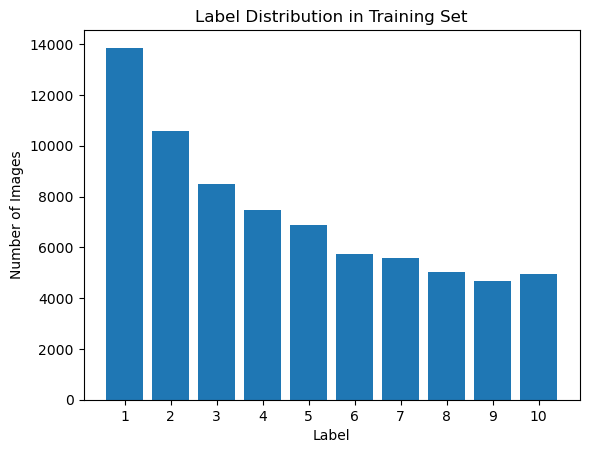

<Figure size 640x480 with 0 Axes>

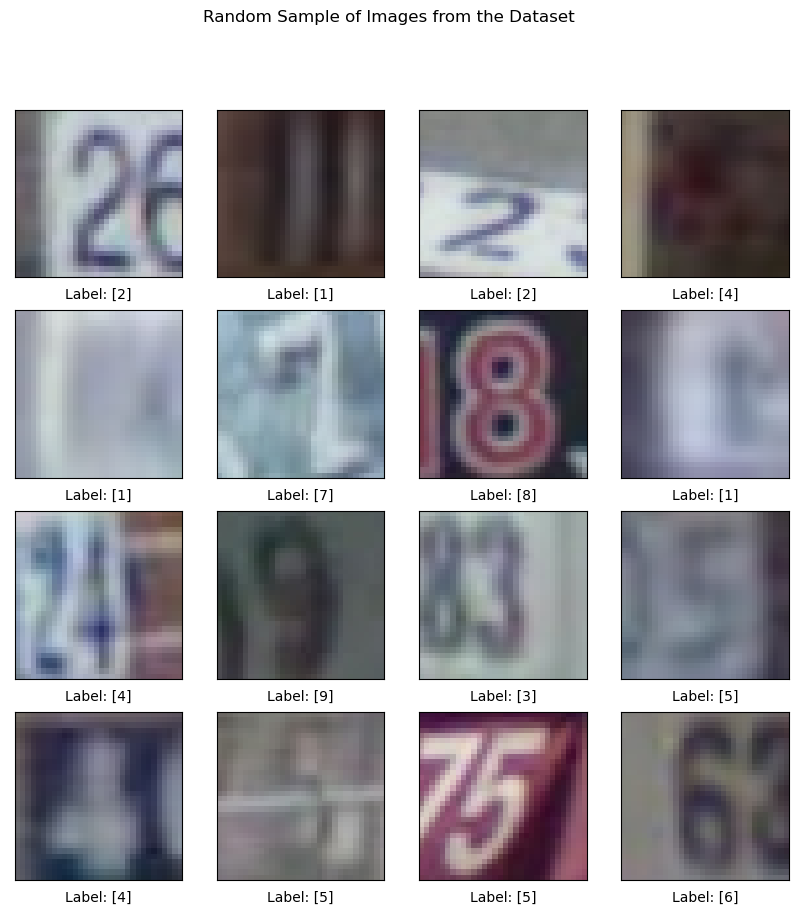

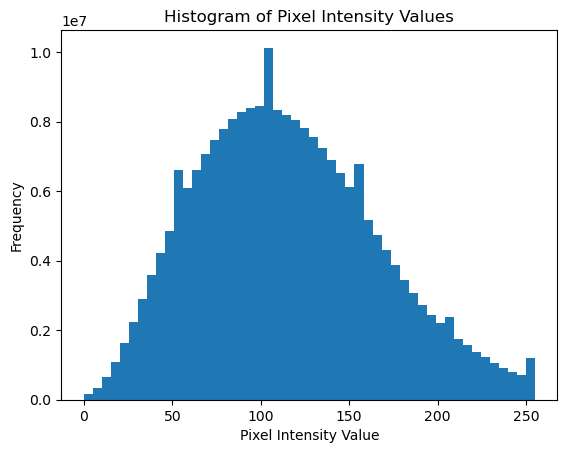

<Figure size 640x480 with 0 Axes>

In [3]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

# Load the training set
train_data = sio.loadmat('train_32x32.mat')

# Bar chart of label distribution in the training set
label_dist = np.bincount(train_data['y'].flatten())
plt.bar(range(1, 11), label_dist[1:])
plt.xticks(range(1, 11))
plt.title('Label Distribution in Training Set')
plt.xlabel('Label')
plt.ylabel('Number of Images')
plt.show()
plt.savefig('label_distribution.png')


# Random sample of images from the dataset
num_samples = 16
sample_indices = np.random.randint(0, train_data['X'].shape[3], size=num_samples)
sample_images = train_data['X'][:, :, :, sample_indices]
sample_labels = train_data['y'][sample_indices]
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(sample_images[:, :, :, i])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(f'Label: {sample_labels[i]}')
plt.suptitle('Random Sample of Images from the Dataset')
plt.show()
plt.savefig('random_sample.png')


# Histogram of pixel intensity values
pixel_vals = train_data['X'].flatten()
plt.hist(pixel_vals, bins=50)
plt.title('Histogram of Pixel Intensity Values')
plt.xlabel('Pixel Intensity Value')
plt.ylabel('Frequency')
plt.show()
plt.savefig('pixel_intensity_histogram.png')


In [30]:
# Loading the training and testing dataset
train_raw = loadmat('train_32x32.mat')
test_raw  = loadmat('test_32x32.mat')

# Converting the image into array
train_images = np.array(train_raw['X'])
test_images = np.array(test_raw['X'])

# Storing the target values
train_labels = train_raw['y']
test_labels = test_raw['y']
print(train_images.shape)
print(test_images.shape)

(32, 32, 3, 73257)
(32, 32, 3, 26032)


In [31]:
# Fixing the axes of the images
train_images = np.moveaxis(train_images, -1, 0)
test_images = np.moveaxis(test_images, -1, 0)

# Printing the shape of the train and test data
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(73257, 32, 32, 3)
(26032, 32, 32, 3)
(73257, 1)
(26032, 1)


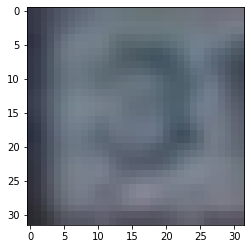

Label:  [3]


In [6]:
# Plot a random image and its label
plt.imshow(train_images[150])
plt.show()

print('Label: ', train_labels[150])

In [32]:
# labels are being squeezed to remove any dimensions of size 1. 
# By squeezing the array,we can ensure that it has the correct shape.
train_labels = np.squeeze(train_labels)
test_labels = np.squeeze(test_labels)
train_labels = np.where(train_labels != 10, train_labels, 0)
test_labels = np.where(test_labels != 10, test_labels, 0)
print(train_labels.shape, test_labels.shape)

(73257,) (26032,)


### STEP 3 - Implementing Data augmentation 

In [8]:
import logging
logging.disable(logging.CRITICAL)

logging.disable(logging.NOTSET)

def randomflip(image):
    logging.disable(logging.CRITICAL)
    data_randomflip = tf.keras.Sequential([
      layers.RandomFlip("horizontal_and_vertical")
    ])
    flipped_image = data_randomflip.predict(image.reshape(1, *image.shape), verbose=0)
    logging.disable(logging.NOTSET)
    return flipped_image

def random_rotation(image):
    logging.disable(logging.CRITICAL)
    data_randomrotation = tf.keras.Sequential([
      layers.RandomRotation(0.2)
    ])
    rotated_img_array = data_randomrotation.predict(image.reshape(1, *image.shape), verbose=0)
    logging.disable(logging.NOTSET)
    return rotated_img_array

def randombrightness(image):
    logging.disable(logging.CRITICAL)
    i = random.randint(0,3)
    data_randombrightness = tf.image.stateless_random_brightness(image, max_delta=0.95, seed=(i,0))
    logging.disable(logging.NOTSET)
    return data_randombrightness.numpy()

def randomcontrast(image):
    logging.disable(logging.CRITICAL)
    i = random.randint(0,3)
    stateless_random_contrast = tf.image.stateless_random_contrast(image, lower=0.1, upper=0.9, seed=(i,0))
    logging.disable(logging.NOTSET)
    return stateless_random_contrast.numpy()

def resize_rescale(image):
    IMG_SIZE = 224
    logging.disable(logging.CRITICAL)
    resize_and_rescale = tf.keras.Sequential([
      layers.Resizing(IMG_SIZE, IMG_SIZE),
      layers.Rescaling(1./255)
    ])
    
    output_image = resize_and_rescale.predict(image.reshape(1, *image.shape), verbose=0)
    logging.disable(logging.NOTSET)
    return output_image

def augment(image, label):
    image = resize_rescale(image)
    if random.random() > 0.5:
        image = randomflip(image)
    if random.random() > 0.5:
        image = random_rotation(image)
    if random.random() > 0.5:
        image = randomcontrast(image)
    if random.random() > 0.5:
        image = randombrightness(image)
    return image, label

In [9]:
num_augmented = 0
augmented_images = []
augmented_labels = []

for i in range(len(train_labels)):
    augmented_image, label = augment(train_images[i], train_labels[i])
    augmented_image = np.squeeze(augmented_image)
    augmented_images.append(augmented_image)
    augmented_labels.append(label)
    num_augmented += 1
    if num_augmented == len(train_labels):
        break
        

In [10]:
def train_resize_rescale(image, label):
    IMG_SIZE = 224

    resize_and_rescale = tf.keras.Sequential([
      layers.Resizing(IMG_SIZE, IMG_SIZE),
      layers.Rescaling(1./255)
    ])
    
    output_image = resize_and_rescale.predict(image.reshape(1, *image.shape), verbose=0)
    return output_image, label

num_resized = 0
resized_train_images = []
resized_train_labels = []

for i in range(len(train_labels)):
    resized_image, label = train_resize_rescale(train_images[i], train_labels[i])
    resized_image = np.squeeze(resized_image)
    resized_train_images.append(resized_image)
    resized_train_labels.append(label)
    num_resized += 1
    if num_resized == len(train_labels):
        break

In [11]:
array1 = np.array(augmented_images)
array2 = np.array(resized_train_images)
X = np.concatenate([array1, array2], axis=0)

In [12]:
def test_resize_rescale(image):
    IMG_SIZE = 224

    resize_and_rescale = tf.keras.Sequential([
      layers.Resizing(IMG_SIZE, IMG_SIZE),
      layers.Rescaling(1./255)
    ])
    
    output_image = resize_and_rescale.predict(image.reshape(1, *image.shape), verbose=0)
    return output_image

num_resized = 0
resized_test_images = []

for i in range(len(test_labels)):
    resized_image = test_resize_rescale(test_images[i])
    resized_image = np.squeeze(resized_image)
    resized_test_images.append(resized_image)
    num_resized += 1
    if num_resized == len(test_labels):
        break

X_test = np.array(resized_test_images)

In [13]:
train_labels = np.squeeze(train_labels)
test_labels = np.squeeze(test_labels)

In [14]:
train_labels = np.concatenate([train_labels, train_labels], axis=0)

In [15]:
train_labels = to_categorical(train_labels, num_classes = 10)
y_test = to_categorical(test_labels, num_classes = 10)

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, train_labels, test_size=0.15, random_state=9)

In [17]:
y_train = np.asarray(y_train).astype('float32')
y_val = np.asarray(y_val).astype('float32')
y_test = np.asarray(y_test).astype('float32')

### STEP 2 - Using CNN architecture from Part III as a base version and adjusting it for SVHN task.

In [18]:
# using best model from part 3
# early stopping and batch normalization

def train_model(model, x_train, y_train, epochs, batch_size, optimizer, loss_fn, validation_data, earlystopping_metric,patience):
  num_batches = len(x_train) // batch_size
  training_losses = []
  training_accuracies = []
  val_losses = []
  val_accuracies = []
  
  start_time = time.time()
  
  for epoch in range(epochs):
      
    epoch_loss = 0
    epoch_accuracy = 0
            
    for batch in range(num_batches):
      start_idx = batch * batch_size
      end_idx = (batch + 1) * batch_size
      x_batch = x_train[start_idx:end_idx]
      y_batch = y_train[start_idx:end_idx]
      y_batch = np.asarray(y_batch).astype('float32')
      
      loss_value, accuracy, model = optimize(optimizer, loss_fn, x_batch, y_batch, model)
      epoch_loss += loss_value
      epoch_accuracy += accuracy
        
    # Calculate average epoch loss and accuracy
    epoch_loss /= num_batches
    epoch_accuracy /= num_batches     
    
    x_val = validation_data[0]
    y_val = validation_data[1]
    val_loss, val_accuracy = model_validate(model, loss_fn, x_val, y_val)
    
    # Early stopping implementation
    if earlystopping_metric == 'loss':
        # early stopping on validation loss
        if epoch > 0 and val_loss >= min(val_losses):
            counter += 1
            if counter == patience:
                print(f'early stopping patience reached {patience}.')
                break
        else: 
            counter = 0

    elif earlystopping_metric == 'accuracy':
        # early stopping on validation accuracy
        if epoch > 0 and val_accuracy <= max(val_accuracies):
            counter += 1
            if counter == patience:
                print(f'early stopping patience reached {patience}.')
                break
        else:
            counter = 0

    print(f"Epoch {epoch+1}: training_loss = {epoch_loss}, val_loss = {val_loss}, training_acc = {epoch_accuracy}, val_acc = {val_accuracy}")
    
    training_losses.append(epoch_loss)
    training_accuracies.append(epoch_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

  stop_time = time.time()
  elapsed_time = (stop_time - start_time) / 60
  
  # plotting Accuracy vs epochs for training and validation sets
  x = [x for x in range(1,len(training_losses) + 1)]
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  
  ax1.set_title(f'Accuracy vs epochs')
  ax1.plot(x, training_accuracies, 'b', label='Training accuracy')
  ax1.plot(x, val_accuracies, 'r', label='Validation accuracy')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Accuracy')
  ax1.legend()
  
  # plotting Losses vs epochs for training and validation sets
  ax2.set_title(f'Losses vs epochs')
  ax2.plot(x, training_losses, 'b', label='Training losses')
  ax2.plot(x, val_losses, 'r', label='Validation losses')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Losses')
  ax2.legend()
  
  plt.show()
  
  return model, elapsed_time


def build_model():

  # Define the input shape
  input_shape = (224, 224, 3)

  # Define the model
  model = Sequential()

  # Add the convolutional layers
  model.add(Conv2D(96, (11, 11), strides=(4, 4), padding='valid', activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(ZeroPadding2D(padding=(2, 2)))
  model.add(Conv2D(256, (5, 5), strides=(1, 1), padding='valid', activation='relu'))
  model.add(Conv2D(256, (5, 5), strides=(1, 1), padding='valid', activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Dropout(0.4))
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

  # Flatten the output from the convolutional layers
  model.add(Flatten())

  # Add the fully connected layers
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(10, activation='softmax'))

  return model


def optimize(optimizer, loss_func, x, y, model):
  with tf.GradientTape() as tape:
    logits = model(x,training=True)
    loss = loss_func(y, logits)           
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(grads_and_vars = zip(gradients, model.trainable_variables), name=None)
  preds = tf.round(logits)
  accuracy = tf.reduce_mean(tf.cast(tf.equal(preds, y), tf.float32))
  return loss, accuracy, model

def model_validate(model, loss_func, x_val, y_val):
  logits = model(x_val)
  val_loss = loss_func(y_val, logits)
  preds = tf.round(logits)
  val_accuracy = tf.reduce_mean(tf.cast(tf.equal(preds, y_val), tf.float32))
  
  return val_loss, val_accuracy


def model_test(model, loss_func, x_test, y_test):
  logits = model(x_test)
  test_loss = loss_func(y_test, logits)
  y_pred = tf.round(logits)
  
  test_accuracy = tf.reduce_mean(tf.cast(tf.equal(y_pred, y_test), tf.float32))
  
  print("Test loss: {}, Test accuracy: {}".format(test_loss, test_accuracy))
  
  return test_loss, test_accuracy

### STEP 4 - Train the network and evaluate the performance on the testing data

/usr/lib/python3/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Epoch 1: training_loss = 2.260967493057251, val_loss = 2.21958327293396, training_acc = 0.8997650742530823, val_acc = 0.8999999761581421
Epoch 2: training_loss = 2.2303149700164795, val_loss = 2.2092723846435547, training_acc = 0.9000008702278137, val_acc = 0.8999999761581421
Epoch 3: training_loss = 2.219539165496826, val_loss = 2.196476459503174, training_acc = 0.9001187086105347, val_acc = 0.8999999761581421
Epoch 4: training_loss = 2.200525999069214, val_loss = 2.1464059352874756, training_acc = 0.9003545641899109, val_acc = 0.9016666412353516
Epoch 5: training_loss = 2.1539762020111084, val_loss = 2.0470407009124756, training_acc = 0.9014156460762024, val_acc = 0.9026666879653931
Epoch 6: training_loss = 2.0589208602905273, val_loss = 1.979597806930542, training_acc = 0.9027714729309082, val_acc = 0.9046666622161865
Epoch 7: training_loss = 1.8756494522094727, val_loss = 1.9157865047454834, training_acc = 0.9057193994522095, val_acc = 0.9010000228881836
Epoch 8: training_loss = 1.

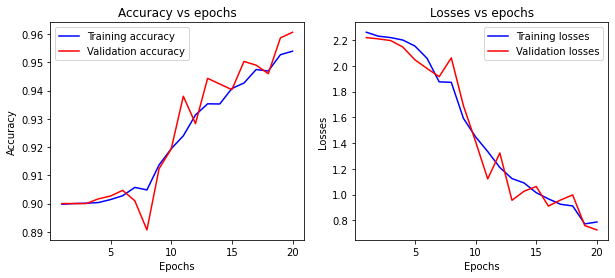

Test loss: 1.09714937210083, Test accuracy: 0.9459999799728394
Model training time: 0.8819677392641704


In [20]:
optimizer = tf.keras.optimizers.SGD(momentum=0.9)
loss_func = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
epochs = 20
batch_size = 16

validation_data = (X_val, y_val)

model = build_model()
trained_model, train_time = train_model(model, X_train, y_train, epochs, batch_size, optimizer, 
                            loss_func, validation_data, earlystopping_metric="loss", patience = 5)
loss, accuracy = model_test(trained_model, loss_func, X_test, y_test)

print(f"Model training time: {train_time}")

### Trying different setups for SVHN model

#### Changing learning rate from default 0.001 to 0.01

/usr/lib/python3/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Epoch 1: training_loss = 2.259978771209717, val_loss = 2.2414069175720215, training_acc = 0.8994107246398926, val_acc = 0.8999999761581421
Epoch 2: training_loss = 2.2333390712738037, val_loss = 2.223863363265991, training_acc = 0.900000274181366, val_acc = 0.8999999761581421
Epoch 3: training_loss = 2.223254680633545, val_loss = 2.220201253890991, training_acc = 0.899882435798645, val_acc = 0.8999999761581421
Epoch 4: training_loss = 2.217075824737549, val_loss = 2.2197177410125732, training_acc = 0.900000274181366, val_acc = 0.8999999761581421
Epoch 5: training_loss = 2.2099738121032715, val_loss = 2.2090017795562744, training_acc = 0.899882435798645, val_acc = 0.8999999761581421
Epoch 6: training_loss = 2.2017877101898193, val_loss = 2.215039014816284, training_acc = 0.9000002145767212, val_acc = 0.8999999761581421
Epoch 7: training_loss = 2.2010955810546875, val_loss = 2.2193233966827393, training_acc = 0.9004720449447632, val_acc = 0.8999999761581421
Epoch 8: training_loss = 2.198

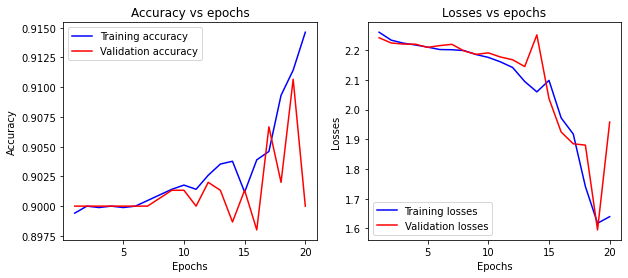

Test loss: 1.9208835363388062, Test accuracy: 0.8999999761581421
Model training time: 0.47764448722203573


In [19]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01, momentum=0.9)
loss_func = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
epochs = 20
batch_size = 16

validation_data = (X_val, y_val)

model = build_model()
trained_model, train_time = train_model(model, X_train, y_train, epochs, batch_size, optimizer, 
                            loss_func, validation_data, earlystopping_metric="loss", patience = 5)
loss, accuracy = model_test(trained_model, loss_func, X_test, y_test)

print(f"Model training time: {train_time}")

### Changing optimizer to Adam

Epoch 1: training_loss = 2.7007088661193848, val_loss = 2.2213146686553955, training_acc = 0.898113489151001, val_acc = 0.8999999761581421
Epoch 2: training_loss = 2.225682497024536, val_loss = 2.2210848331451416, training_acc = 0.900000274181366, val_acc = 0.8999999761581421
Epoch 3: training_loss = 2.222322702407837, val_loss = 2.2213127613067627, training_acc = 0.900000274181366, val_acc = 0.8999999761581421
Epoch 4: training_loss = 2.219273328781128, val_loss = 2.221713066101074, training_acc = 0.900000274181366, val_acc = 0.8999999761581421
Epoch 5: training_loss = 2.2191550731658936, val_loss = 2.2218754291534424, training_acc = 0.900000274181366, val_acc = 0.8999999761581421
Epoch 6: training_loss = 2.2176716327667236, val_loss = 2.222656726837158, training_acc = 0.900000274181366, val_acc = 0.8999999761581421
Epoch 7: training_loss = 2.2172763347625732, val_loss = 2.220959186553955, training_acc = 0.900000274181366, val_acc = 0.8999999761581421
Epoch 8: training_loss = 2.215310

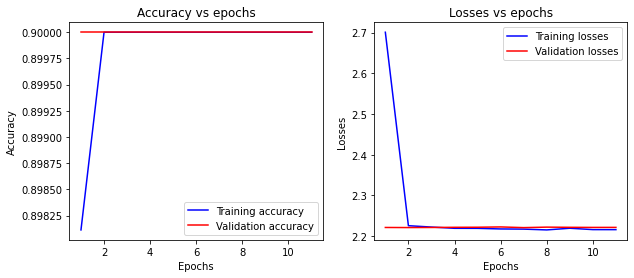

Test loss: 2.1885170936584473, Test accuracy: 0.8999999761581421
Model training time: 0.24284398953119915


In [21]:
optimizer = tf.keras.optimizers.Adam()
loss_func = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
epochs = 20
batch_size = 16

validation_data = (X_val, y_val)

model = build_model()
trained_model, train_time = train_model(model, X_train, y_train, epochs, batch_size, optimizer, 
                            loss_func, validation_data, earlystopping_metric="loss", patience = 5)
loss, accuracy = model_test(trained_model, loss_func, X_test, y_test)

print(f"Model training time: {train_time}")

### Changing Adam learning rate from default 0.001 to 0.01

Epoch 1: training_loss = 999911.5, val_loss = 2.2938830852508545, training_acc = 0.8900943994522095, val_acc = 0.8999999761581421
Epoch 2: training_loss = 2.2944610118865967, val_loss = 2.22709321975708, training_acc = 0.8997645378112793, val_acc = 0.8999999761581421
Epoch 3: training_loss = 2.2263524532318115, val_loss = 2.2274067401885986, training_acc = 0.900000274181366, val_acc = 0.8999999761581421
Epoch 4: training_loss = 2.235572576522827, val_loss = 2.223508358001709, training_acc = 0.900000274181366, val_acc = 0.8999999761581421
Epoch 5: training_loss = 2.2249011993408203, val_loss = 2.2220842838287354, training_acc = 0.900000274181366, val_acc = 0.8999999761581421
Epoch 6: training_loss = 2.2227494716644287, val_loss = 2.22413969039917, training_acc = 0.900000274181366, val_acc = 0.8999999761581421
Epoch 7: training_loss = 2.2204973697662354, val_loss = 2.223051071166992, training_acc = 0.900000274181366, val_acc = 0.8999999761581421
Epoch 8: training_loss = 2.21977162361145,

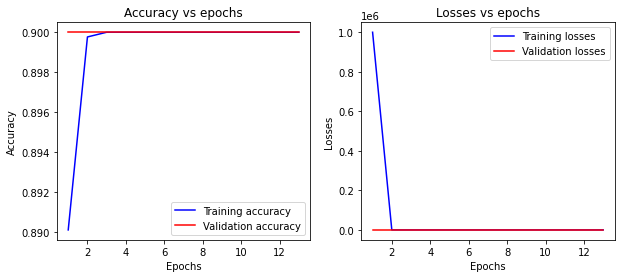

Test loss: 2.186145782470703, Test accuracy: 0.8999999761581421
Model training time: 0.28640605211257936


In [22]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss_func = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
epochs = 20
batch_size = 16

validation_data = (X_val, y_val)

model = build_model()
trained_model, train_time = train_model(model, X_train, y_train, epochs, batch_size, optimizer, 
                            loss_func, validation_data, earlystopping_metric="loss", patience = 5)
loss, accuracy = model_test(trained_model, loss_func, X_test, y_test)

print(f"Model training time: {train_time}")

### Using SGD and adding multiple Dropout layers

Epoch 1: training_loss = 2.3368382453918457, val_loss = 2.2493398189544678, training_acc = 0.898349404335022, val_acc = 0.8999999761581421
Epoch 2: training_loss = 2.242352247238159, val_loss = 2.233860492706299, training_acc = 0.8997645378112793, val_acc = 0.8999999761581421
Epoch 3: training_loss = 2.2289576530456543, val_loss = 2.225800037384033, training_acc = 0.900000274181366, val_acc = 0.8999999761581421
Epoch 4: training_loss = 2.2220568656921387, val_loss = 2.226959466934204, training_acc = 0.900000274181366, val_acc = 0.8999999761581421
Epoch 5: training_loss = 2.2173359394073486, val_loss = 2.224233865737915, training_acc = 0.899882435798645, val_acc = 0.8999999761581421
Epoch 6: training_loss = 2.214536666870117, val_loss = 2.2270076274871826, training_acc = 0.900000274181366, val_acc = 0.8999999761581421
Epoch 7: training_loss = 2.2168726921081543, val_loss = 2.229766607284546, training_acc = 0.900000274181366, val_acc = 0.8999999761581421
Epoch 8: training_loss = 2.214780

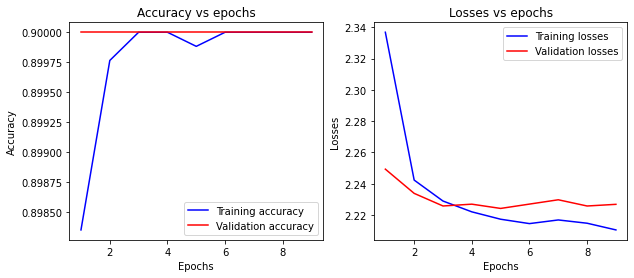

Test loss: 2.1944971084594727, Test accuracy: 0.8999999761581421
Model training time: 0.2103168567021688


In [23]:
def build_model():

  # Define the input shape
  input_shape = (224, 224, 3)

  # Define the model
  model = Sequential()

  # Add the convolutional layers
  model.add(Conv2D(96, (11, 11), strides=(4, 4), padding='valid', activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
  model.add(Dropout(0.4))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(ZeroPadding2D(padding=(2, 2)))
  model.add(Conv2D(256, (5, 5), strides=(1, 1), padding='valid', activation='relu'))
  model.add(Conv2D(256, (5, 5), strides=(1, 1), padding='valid', activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
  model.add(Dropout(0.4))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Dropout(0.4))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Dropout(0.4))
  model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

  # Flatten the output from the convolutional layers
  model.add(Flatten())

  # Add the fully connected layers
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(10, activation='softmax'))

  return model

optimizer = tf.keras.optimizers.SGD(momentum=0.9)
loss_func = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
epochs = 20
batch_size = 16

validation_data = (X_val, y_val)

model = build_model()
trained_model, train_time = train_model(model, X_train, y_train, epochs, batch_size, optimizer, 
                            loss_func, validation_data, earlystopping_metric="loss", patience = 5)
loss, accuracy = model_test(trained_model, loss_func, X_test, y_test)

print(f"Model training time: {train_time}")

### Using LeakyReLU activation function instead of ReLU along with SGD and multiple dropout layers

Epoch 1: training_loss = 2.351623296737671, val_loss = 2.2636404037475586, training_acc = 0.8982314467430115, val_acc = 0.8999999761581421
Epoch 2: training_loss = 2.233149766921997, val_loss = 2.232254981994629, training_acc = 0.900000274181366, val_acc = 0.8999999761581421
Epoch 3: training_loss = 2.22922945022583, val_loss = 2.229940891265869, training_acc = 0.900000274181366, val_acc = 0.8999999761581421
Epoch 4: training_loss = 2.2207870483398438, val_loss = 2.222226619720459, training_acc = 0.900000274181366, val_acc = 0.8999999761581421
Epoch 5: training_loss = 2.2210259437561035, val_loss = 2.226578712463379, training_acc = 0.900000274181366, val_acc = 0.8999999761581421
Epoch 6: training_loss = 2.217057228088379, val_loss = 2.225029230117798, training_acc = 0.900000274181366, val_acc = 0.8999999761581421
Epoch 7: training_loss = 2.2174949645996094, val_loss = 2.225963830947876, training_acc = 0.900000274181366, val_acc = 0.8999999761581421
Epoch 8: training_loss = 2.2168476581

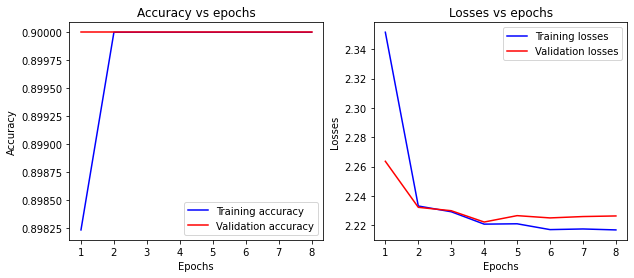

Test loss: 2.1942858695983887, Test accuracy: 0.8999999761581421
Model training time: 0.19800275961558025


In [27]:
def build_model():

  # Define the input shape
  input_shape = (224, 224, 3)

  # Define the model
  model = Sequential()

  # Add the convolutional layers
  model.add(Conv2D(96, (11, 11), strides=(4, 4), padding='valid', activation=keras.layers.LeakyReLU(alpha=0.01), input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
  model.add(Dropout(0.4))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(ZeroPadding2D(padding=(2, 2)))
  model.add(Conv2D(256, (5, 5), strides=(1, 1), padding='valid', activation=keras.layers.LeakyReLU(alpha=0.01)))
  model.add(Conv2D(256, (5, 5), strides=(1, 1), padding='valid', activation=keras.layers.LeakyReLU(alpha=0.01)))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
  model.add(Dropout(0.4))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation=keras.layers.LeakyReLU(alpha=0.01)))
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation=keras.layers.LeakyReLU(alpha=0.01)))
  model.add(Dropout(0.4))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation=keras.layers.LeakyReLU(alpha=0.01)))
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation=keras.layers.LeakyReLU(alpha=0.01)))
  model.add(Dropout(0.4))
  model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation=keras.layers.LeakyReLU(alpha=0.01)))
  model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation=keras.layers.LeakyReLU(alpha=0.01)))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

  # Flatten the output from the convolutional layers
  model.add(Flatten())

  # Add the fully connected layers
  model.add(Dense(4096, activation=keras.layers.LeakyReLU(alpha=0.01)))
  model.add(Dropout(0.4))
  model.add(Dense(4096, activation=keras.layers.LeakyReLU(alpha=0.01)))
  model.add(Dropout(0.4))
  model.add(Dense(10, activation='softmax'))

  return model

optimizer = tf.keras.optimizers.SGD(momentum=0.9)
loss_func = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
epochs = 20
batch_size = 16

validation_data = (X_val, y_val)

model = build_model()
trained_model, train_time = train_model(model, X_train, y_train, epochs, batch_size, optimizer, 
                            loss_func, validation_data, earlystopping_metric="loss", patience = 5)
loss, accuracy = model_test(trained_model, loss_func, X_test, y_test)

print(f"Model training time: {train_time}")

### Using Adam optimizer with Leaky ReLU activation and multiple dropout layers

Epoch 1: training_loss = 3.0114400386810303, val_loss = 2.4348554611206055, training_acc = 0.8969341516494751, val_acc = 0.8980000019073486
Epoch 2: training_loss = 2.269739866256714, val_loss = 2.246032238006592, training_acc = 0.8995285630226135, val_acc = 0.8999999761581421
Epoch 3: training_loss = 2.254798650741577, val_loss = 2.2363193035125732, training_acc = 0.899646520614624, val_acc = 0.8999999761581421
Epoch 4: training_loss = 2.2350668907165527, val_loss = 2.248713731765747, training_acc = 0.899882435798645, val_acc = 0.8999999761581421
Epoch 5: training_loss = 2.3030202388763428, val_loss = 2.705392360687256, training_acc = 0.8987030386924744, val_acc = 0.8826666474342346
Epoch 6: training_loss = 52.218868255615234, val_loss = 1361.5101318359375, training_acc = 0.8521225452423096, val_acc = 0.8333333134651184
Epoch 7: training_loss = 7100.15625, val_loss = 1939.23046875, training_acc = 0.8246464133262634, val_acc = 0.8293333053588867
early stopping patience reached 5.


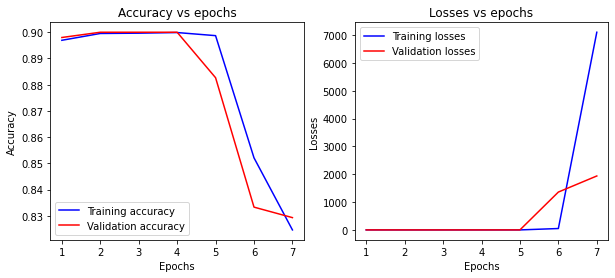

Test loss: 897.75830078125, Test accuracy: 0.8259999752044678
Model training time: 0.18364393711090088


In [29]:
def build_model():

  # Define the input shape
  input_shape = (224, 224, 3)

  # Define the model
  model = Sequential()

  # Add the convolutional layers
  model.add(Conv2D(96, (11, 11), strides=(4, 4), padding='valid', activation=keras.layers.LeakyReLU(alpha=0.01), input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
  model.add(Dropout(0.4))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(ZeroPadding2D(padding=(2, 2)))
  model.add(Conv2D(256, (5, 5), strides=(1, 1), padding='valid', activation=keras.layers.LeakyReLU(alpha=0.01)))
  model.add(Conv2D(256, (5, 5), strides=(1, 1), padding='valid', activation=keras.layers.LeakyReLU(alpha=0.01)))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
  model.add(Dropout(0.4))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation=keras.layers.LeakyReLU(alpha=0.01)))
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation=keras.layers.LeakyReLU(alpha=0.01)))
  model.add(Dropout(0.4))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation=keras.layers.LeakyReLU(alpha=0.01)))
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation=keras.layers.LeakyReLU(alpha=0.01)))
  model.add(Dropout(0.4))
  model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation=keras.layers.LeakyReLU(alpha=0.01)))
  model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation=keras.layers.LeakyReLU(alpha=0.01)))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

  # Flatten the output from the convolutional layers
  model.add(Flatten())

  # Add the fully connected layers
  model.add(Dense(4096, activation=keras.layers.LeakyReLU(alpha=0.01)))
  model.add(Dropout(0.4))
  model.add(Dense(4096, activation=keras.layers.LeakyReLU(alpha=0.01)))
  model.add(Dropout(0.4))
  model.add(Dense(10, activation='softmax'))

  return model

optimizer = tf.keras.optimizers.Adam()
loss_func = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
epochs = 20
batch_size = 16

validation_data = (X_val, y_val)

model = build_model()
trained_model, train_time = train_model(model, X_train, y_train, epochs, batch_size, optimizer, 
                            loss_func, validation_data, earlystopping_metric="loss", patience = 5)
loss, accuracy = model_test(trained_model, loss_func, X_test, y_test)

print(f"Model training time: {train_time}")